### imort necessery libraries


In [107]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
import glob

In [108]:
from skimage.transform import resize

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
from sklearn.utils import shuffle

In [111]:
cats = glob.glob('test_set/cats/*.jpg')
cats_training = glob.glob('training_set/cats/*.jpg')
dogs = glob.glob('test_set/dogs/*.jpg')
dogs_training = glob.glob('training_set/dogs/*.jpg')

In [112]:
pwd

'C:\\Users\\Pakistan\\Desktop\\NIVEDITHA\\Deep Learning\\cat and dog\\cat and dog'

### find the number of images in the training and testing set

In [113]:
print(f'Number of images in cats is {len(cats)}')
print (f'Number of images in dogs is {len(dogs)}')
print(f'Number of images in cats_training is {len(cats_training)}')
print(f'Number of images in dogs_training is {len(dogs_training)}')

Number of images in cats is 38
Number of images in dogs is 56
Number of images in cats_training is 108
Number of images in dogs_training is 107


## Store all the images inside a list and create a list with the corresponding labelsbin

### for training set

In [114]:
image = []
label = []
for i in cats :
    img = plt.imread(i)
    image.append(img)
    label.append(0) 
for i in dogs :
    img = plt.imread(i) 
    image.append(img) 
    label.append(1)
    

### for testing set

In [115]:
image_test=[]
label_test=[]
for i in cats:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
for i in dogs:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set)

In [116]:
image,label = shuffle(image,label,random_state=100)

In [117]:
image_test,label_test = shuffle(image_test,label_test)

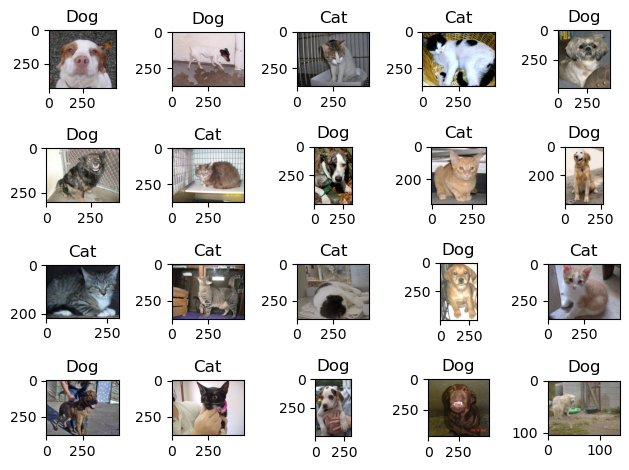

In [118]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('Dog')
    else:
        plt.title('Cat')
    plt.tight_layout()

### Reshape the images both training and testing set

### Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [119]:
xtrain =[]
for i in image:
    xtrain.append(resize(i,(64,64,3)))
xtrain = np.array(xtrain)

In [120]:
xtest=[]
for i in image_test:
    xtest.append(resize(i,(64,64,3)))
xtest = np.array(xtest)

### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

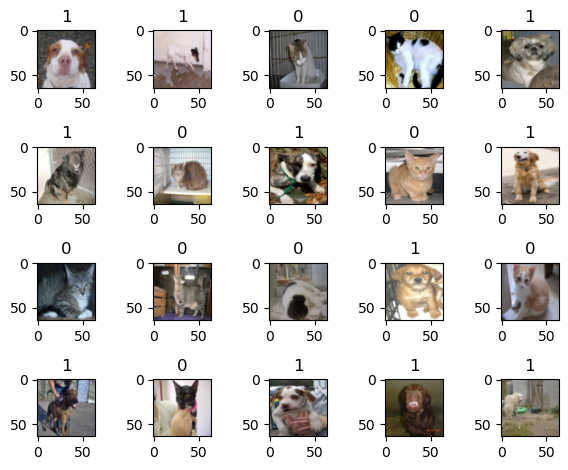

In [122]:
ytrain=np.array(label)
ytest=np.array(label_test)

for i in range (20):
    plt.subplot(4,5, i+1)
    plt.imshow(xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [123]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\Pakistan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [124]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Check the summary of the model 

In [125]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [126]:
model.fit(xtrain,ytrain,epochs=30, validation_split=0.1)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.4963 - loss: 0.7098 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5744 - loss: 0.6936 - val_accuracy: 0.3000 - val_loss: 0.7214
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5439 - loss: 0.6897 - val_accuracy: 0.7000 - val_loss: 0.6546
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5924 - loss: 0.6581 - val_accuracy: 0.7000 - val_loss: 0.6175
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6159 - loss: 0.6424 - val_accuracy: 0.7000 - val_loss: 0.6197
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5924 - loss: 0.6368 - val_accuracy: 0.7000 - val_loss: 0.6476
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7026 - loss: 0.6226 - val_accuracy: 0.7000 - val_loss: 0.6452
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7182 - loss: 0.6103 - val_accuracy: 0.7000 - val_loss: 0.6215

### Make predictions with X_test

In [127]:
prediction= model.predict(xtest)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [128]:
prediction =  list(map(lambda x:1 if x>.5 else 0,prediction))

### Viswalise confusion matrix 

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

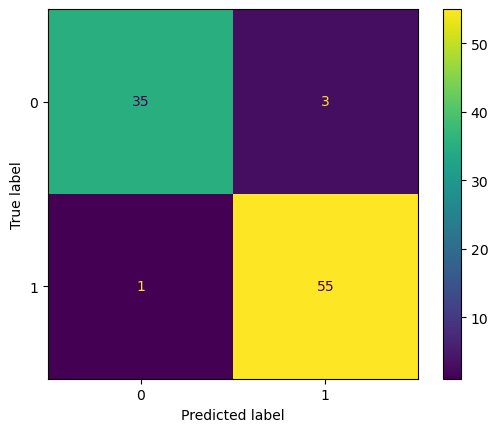

In [130]:
ConfusionMatrixDisplay.from_predictions(ytest,prediction)